In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv("HomeC.csv",low_memory=False)
print(f'HomeC.csv : {df.shape}')
df.head(3)
df.columns = [i.replace(' [kW]', '') for i in df.columns]
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)
df[df.isnull().any(axis=1)]
df = df[0:-1]
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df = df.set_index(df['time'])
dataset = df.drop(['time'], axis=1)
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.weekofyear)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.drop(['House overall','Solar', 'gen'], axis=1, inplace=True)
df

HomeC.csv : (503911, 32)


C:\Users\zz110\AppData\Local\Temp\ipykernel_1464\1648262038.py:10: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
C:\Users\zz110\AppData\Local\Temp\ipykernel_1464\1648262038.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)


,time,use,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,precipProbability,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,0.00,0.082617,0.000567,2016,1,1,Friday,53,5,0
2016-01-01 05:01:00,2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,0.00,0.084533,0.000567,2016,1,1,Friday,53,5,1
2016-01-01 05:02:00,2016-01-01 05:02:00,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,0.00,0.083017,0.000617,2016,1,1,Friday,53,5,2
2016-01-01 05:03:00,2016-01-01 05:03:00,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,0.00,0.175417,0.000650,2016,1,1,Friday,53,5,3
2016-01-01 05:04:00,2016-01-01 05:04:00,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,0.00,0.300917,0.000783,2016,1,1,Friday,53,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:25:00,2016-12-16 03:25:00,1.601233,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,0.003800,...,0.51,0.727683,0.000633,2016,12,16,Friday,50,3,25
2016-12-16 03:26:00,2016-12-16 03:26:00,1.599333,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,0.003800,...,0.51,0.729050,0.000600,2016,12,16,Friday,50,3,26
2016-12-16 03:27:00,2016-12-16 03:27:00,1.924267,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,0.003750,...,0.51,1.060117,0.000600,2016,12,16,Friday,50,3,27


<Axes: xlabel='time'>

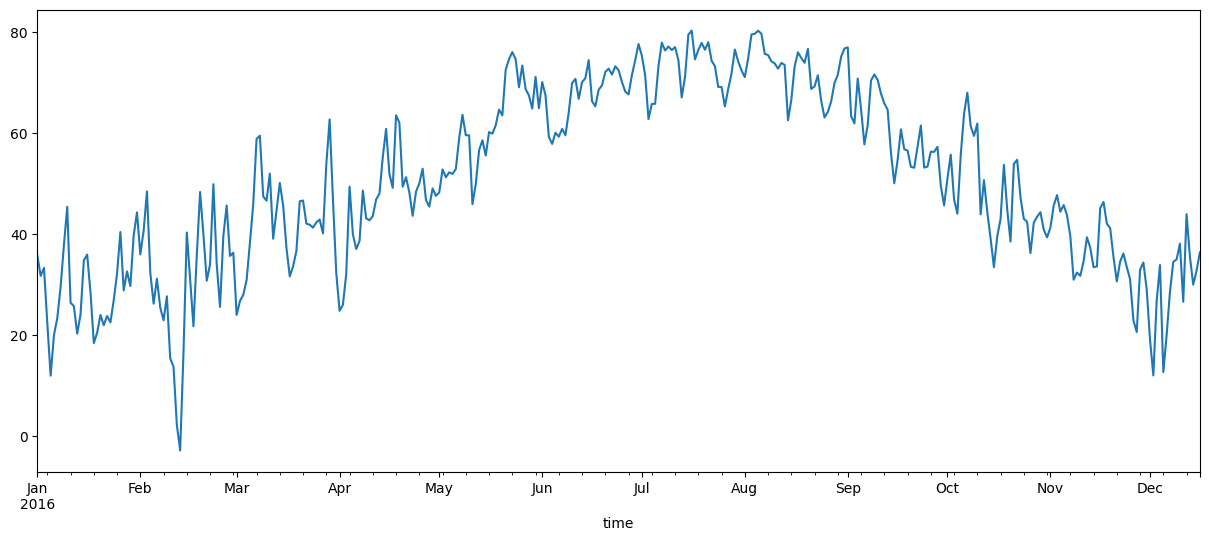

In [3]:
df['temperature'].resample('D').mean().plot(figsize=(15,6))

<Axes: xlabel='time'>

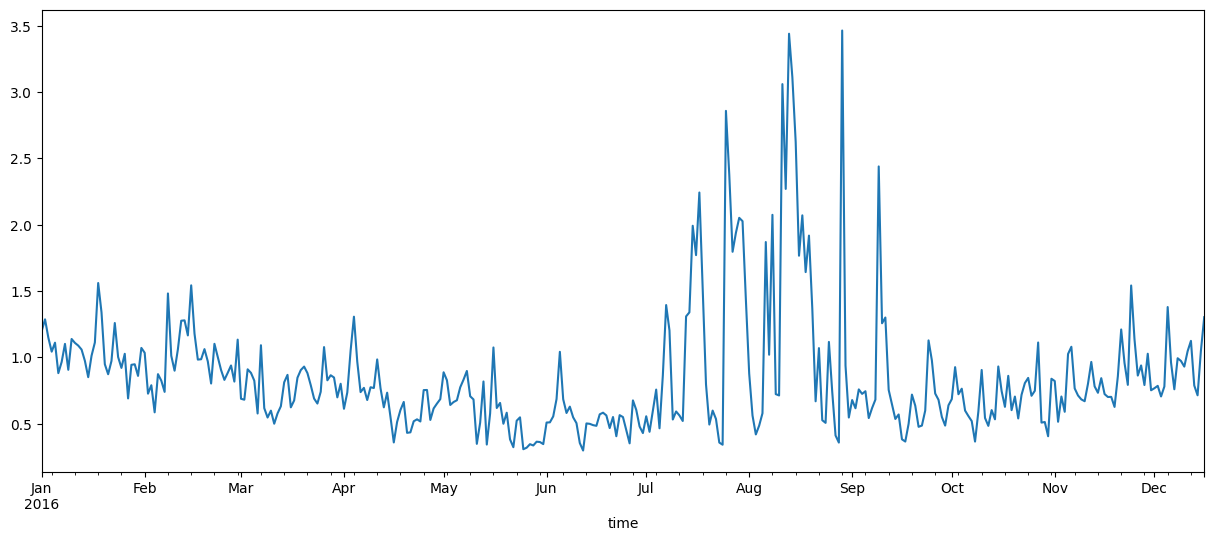

In [4]:
df['use'].resample('D').mean().plot(figsize=(15,6))

<Axes: xlabel='time'>

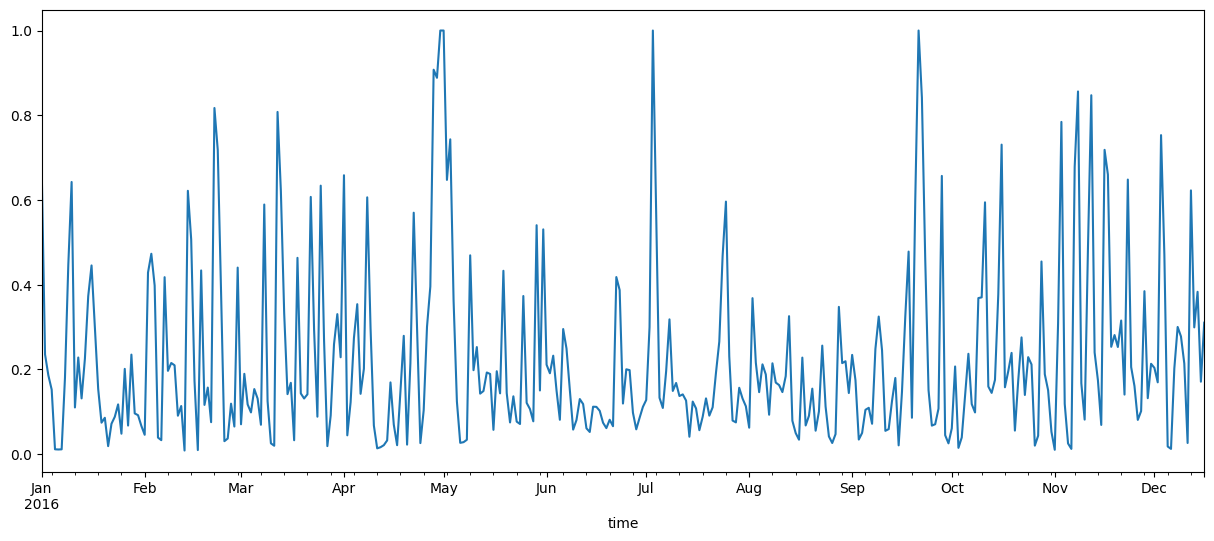

In [5]:
df['cloudCover'].resample(rule='D').mean().plot(figsize=(15,6))

<Axes: xlabel='time'>

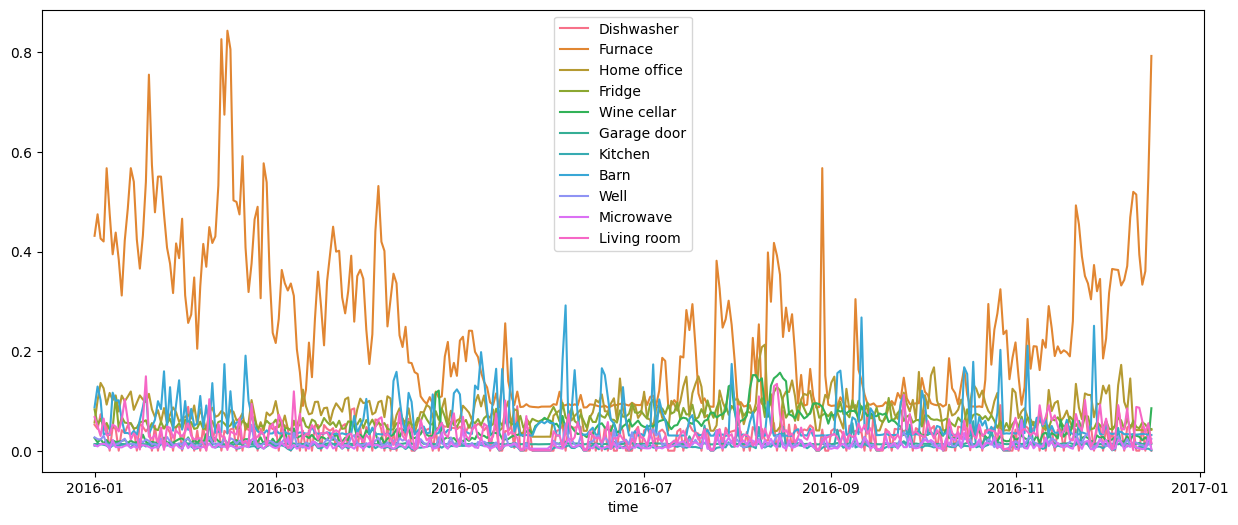

In [6]:
appliances_energy_cols = ['Dishwasher', 'Furnace','Home office',
                       'Fridge', 'Wine cellar', 'Garage door','Kitchen', 
                       'Barn', 'Well', 'Microwave', 'Living room', 
                       ]
rooms_energy_per_day = df[appliances_energy_cols].resample('D').mean()   
plt.figure(figsize=(15,6))
sns.lineplot(data=rooms_energy_per_day, dashes=False)

C:\Users\zz110\AppData\Local\Temp\ipykernel_12100\400353923.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weather_per_day = df[weather_columns].resample('M').mean()


<Axes: xlabel='time'>

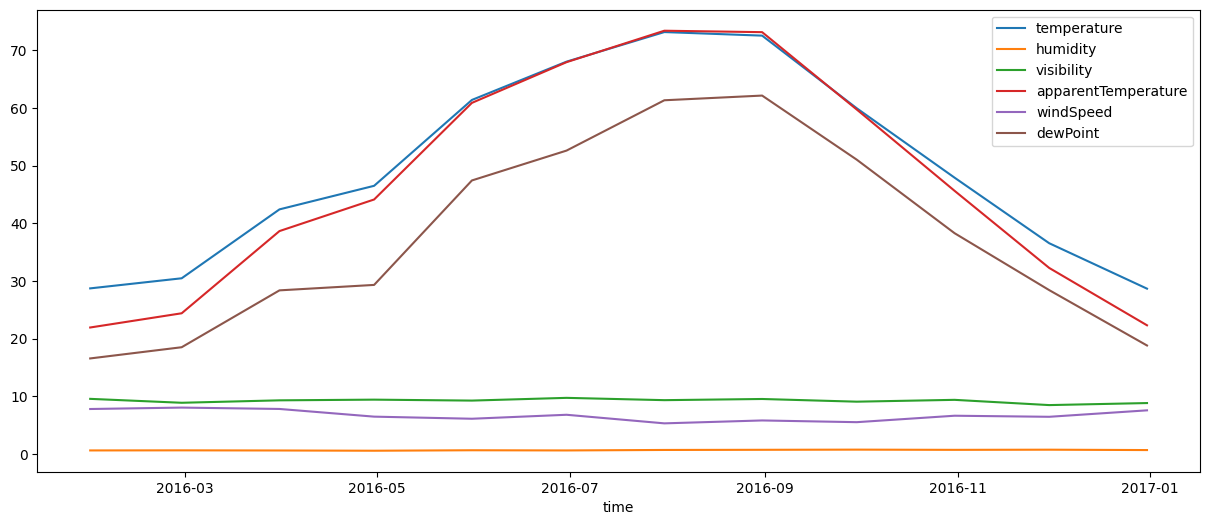

In [7]:
weather_columns = ['temperature','humidity', 'visibility', 'apparentTemperature', 
                   'windSpeed', 'dewPoint']
weather_per_day = df[weather_columns].resample('M').mean()   
plt.figure(figsize=(15,6))
sns.lineplot(data=weather_per_day, dashes=False)

In [3]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, dropout_rate):
        super(ANN, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_layers[0]))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_rate))
        
        for i in range(1, len(hidden_layers)):
            self.layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_rate))
        
        self.layers.append(nn.Linear(hidden_layers[-1], output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [4]:
class PSO:
    def __init__(self, model, w, c1, c2, num_particles, max_iters, x_train, y_train, x_val, y_val, use_adam=False):
        self.model = model
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.num_particles = num_particles
        self.max_iters = max_iters
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.use_adam = use_adam
        self.particles = [self._initialize_particle() for _ in range(num_particles)]
        self.gbest_position = None
        self.gbest_fitness = float('inf')
        self.fitness_progress = []

        if self.use_adam:
            self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
            self.criterion = nn.MSELoss()

    def _initialize_particle(self):
        position = [torch.randn(param.size()) for param in self.model.parameters()]
        velocity = [torch.zeros(param.size()) for param in self.model.parameters()]
        return {'position': position, 'velocity': velocity, 'pbest': position, 'pbest_fitness': float('inf')}

    def optimize(self):
        for iteration in range(self.max_iters):
            for particle in self.particles:
                if self.use_adam:
                    fitness = self._evaluate_fitness_adam()
                else:
                    fitness = self._evaluate_fitness(particle['position'])
                
                if fitness < particle['pbest_fitness']:
                    particle['pbest'] = particle['position']
                    particle['pbest_fitness'] = fitness
                if fitness < self.gbest_fitness:
                    self.gbest_position = particle['position']
                    self.gbest_fitness = fitness

            if not self.use_adam:
                for particle in self.particles:
                    for i in range(len(particle['position'])):
                        inertia = self.w * particle['velocity'][i]
                        cognitive = self.c1 * torch.rand(1) * (particle['pbest'][i] - particle['position'][i])
                        social = self.c2 * torch.rand(1) * (self.gbest_position[i] - particle['position'][i])
                        particle['velocity'][i] = inertia + cognitive + social
                        particle['position'][i] += particle['velocity'][i]

            self.fitness_progress.append(self.gbest_fitness)
            if (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration + 1}/{self.max_iters}, Best Fitness: {self.gbest_fitness}")

        return self.gbest_fitness

    def _evaluate_fitness(self, position):
        with torch.no_grad():
            for param, pos in zip(self.model.parameters(), position):
                param.copy_(pos)
        self.model.eval()
        train_outputs = self.model(self.x_train)
        train_loss = nn.MSELoss()(train_outputs, self.y_train)
        val_outputs = self.model(self.x_val)
        val_loss = nn.MSELoss()(val_outputs, self.y_val)
        return 0.6 * train_loss.item() + 0.4 * val_loss.item()

    def _evaluate_fitness_adam(self):
        self.model.train()
        self.optimizer.zero_grad()
        train_outputs = self.model(self.x_train)
        train_loss = self.criterion(train_outputs, self.y_train)
        train_loss.backward()
        self.optimizer.step()

        self.model.eval()
        with torch.no_grad():
            val_outputs = self.model(self.x_val)
            val_loss = self.criterion(val_outputs, self.y_val)

        return 0.6 * train_loss.item() + 0.4 * val_loss.item()

In [11]:
dropout_values = np.round(np.arange(0.1, 1, 0.1),1)
hidden_layer_architectures = [
    [16],
    [32],
    [64],
    [128],
    [32, 16],
    [64, 32],
    [128,64],
    [64, 32, 16],
    [128,64, 32],
    [256, 128,64],
]
inertia_weights = np.round(np.arange(0.1, 1.0, 0.1),1)
c1_values = np.round(np.arange(0.1, 2, 0.1),1)
c2_values = np.round(np.arange(0.1, 2, 0.1),1)
particle_counts = range(10, 200, 10)
max_iterations_values = range(100, 1000, 100)

best_dropout_rate = None
best_hidden_layers = None
best_inertia_weight = None
best_c1 = None
best_c2 = None
best_num_particles = None
best_max_iters = None
best_fitness = float('inf')

best_dropout_rate = 0.1
best_hidden_layers = [16]
best_inertia_weight = 0.1
best_c1 = 0.1
best_c2 = 0.1
best_num_particles = 10
best_max_iters = 100

initial_hidden_layers = [16]
initial_inertia_weight = 0.1
initial_c1 = 0.1
initial_c2 = 0.1
initial_num_particles = 10
initial_max_iters = 100

In [9]:
def flatten_param(param):
    if isinstance(param, (list, tuple)):
        return '_'.join(map(str, param))
    return str(param)

def plot_results(results, parameter_name):
    x, y = zip(*results)
    x = [flatten_param(param) for param in x]
    plt.figure(figsize=(15,6))
    plt.plot(range(len(x)), y, marker='o')
    plt.title(f'Effect of {parameter_name} on Fitness')
    plt.xlabel(parameter_name)
    plt.ylabel('Fitness')
    plt.xticks(range(len(x)), x, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

features = df.drop(['use'], axis=1).select_dtypes(include=[np.number]).values
labels = df['use'].values

x_train, x_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
x_val_tensor = torch.tensor(x_val_scaled, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

In [22]:
def run_ANN_PSO(dropout_rate, hidden_layers, w, c1, c2, num_particles, max_iters):
    model = ANN(28, hidden_layers, 1, dropout_rate).to(device)
    pso = PSO(model, w, c1, c2, num_particles, max_iters, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor, use_adam=True)
    fitness = pso.optimize()
    return fitness

Iteration 10/100, Best Fitness: 0.6803590059280396
Iteration 20/100, Best Fitness: 0.4648002743721008
Iteration 30/100, Best Fitness: 0.3593746662139893
Iteration 40/100, Best Fitness: 0.31964046955108644
Iteration 50/100, Best Fitness: 0.30234436988830565
Iteration 60/100, Best Fitness: 0.2915458083152771
Iteration 70/100, Best Fitness: 0.28249829411506655
Iteration 80/100, Best Fitness: 0.2746125519275665
Iteration 90/100, Best Fitness: 0.2674699783325195
Iteration 100/100, Best Fitness: 0.2613465845584869
Dropout Rate: 0.1, Fitness: 0.2613465845584869
Iteration 10/100, Best Fitness: 1.430285382270813
Iteration 20/100, Best Fitness: 0.8372842311859131
Iteration 30/100, Best Fitness: 0.677656602859497
Iteration 40/100, Best Fitness: 0.5753437757492066
Iteration 50/100, Best Fitness: 0.5060579895973205
Iteration 60/100, Best Fitness: 0.4650950312614441
Iteration 70/100, Best Fitness: 0.43814682364463803
Iteration 80/100, Best Fitness: 0.4202345609664917
Iteration 90/100, Best Fitness: 

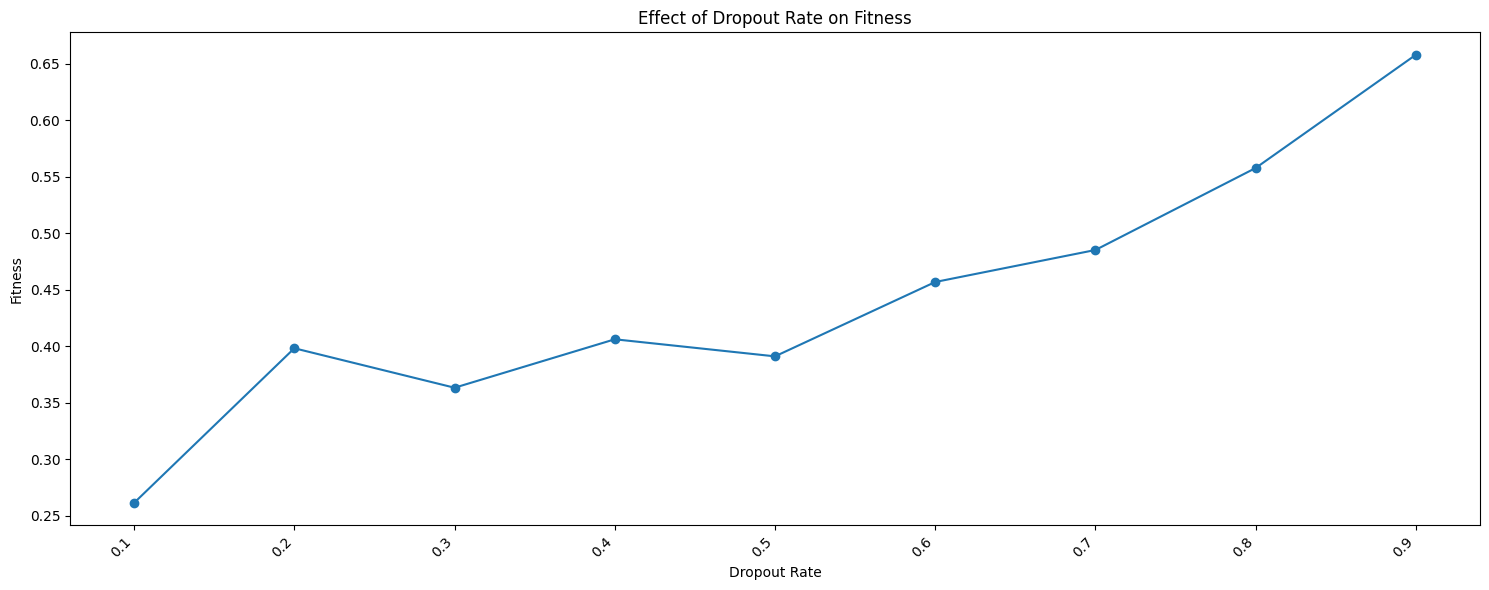

In [15]:
dropout_results = []
for dropout_rate in dropout_values:
    fitness = run_ANN_PSO(dropout_rate, initial_hidden_layers, initial_inertia_weight, 
                          initial_c1, initial_c2, initial_num_particles, initial_max_iters)
    dropout_results.append((dropout_rate, fitness))
    print(f'Dropout Rate: {dropout_rate}, Fitness: {fitness}')
    if fitness < best_fitness:
        best_dropout_rate = dropout_rate
        best_fitness = fitness

best_fitness = float('inf')
plot_results(dropout_results, 'Dropout Rate')

Iteration 10/100, Best Fitness: 0.7364944815635681
Iteration 20/100, Best Fitness: 0.5092604994773865
Iteration 30/100, Best Fitness: 0.39159907698631286
Iteration 40/100, Best Fitness: 0.3355132877826691
Iteration 50/100, Best Fitness: 0.3112539887428284
Iteration 60/100, Best Fitness: 0.29557990431785586
Iteration 70/100, Best Fitness: 0.28174629211425783
Iteration 80/100, Best Fitness: 0.2695894181728363
Iteration 90/100, Best Fitness: 0.258812689781189
Iteration 100/100, Best Fitness: 0.2507838428020477
Hidden Layers: [16], Fitness: 0.2507838428020477
Iteration 10/100, Best Fitness: 0.729718017578125
Iteration 20/100, Best Fitness: 0.48762135505676274
Iteration 30/100, Best Fitness: 0.3617612838745117
Iteration 40/100, Best Fitness: 0.3161483943462372
Iteration 50/100, Best Fitness: 0.2930950582027435
Iteration 60/100, Best Fitness: 0.2802436113357544
Iteration 70/100, Best Fitness: 0.2694790542125702
Iteration 80/100, Best Fitness: 0.261702561378479
Iteration 90/100, Best Fitness:

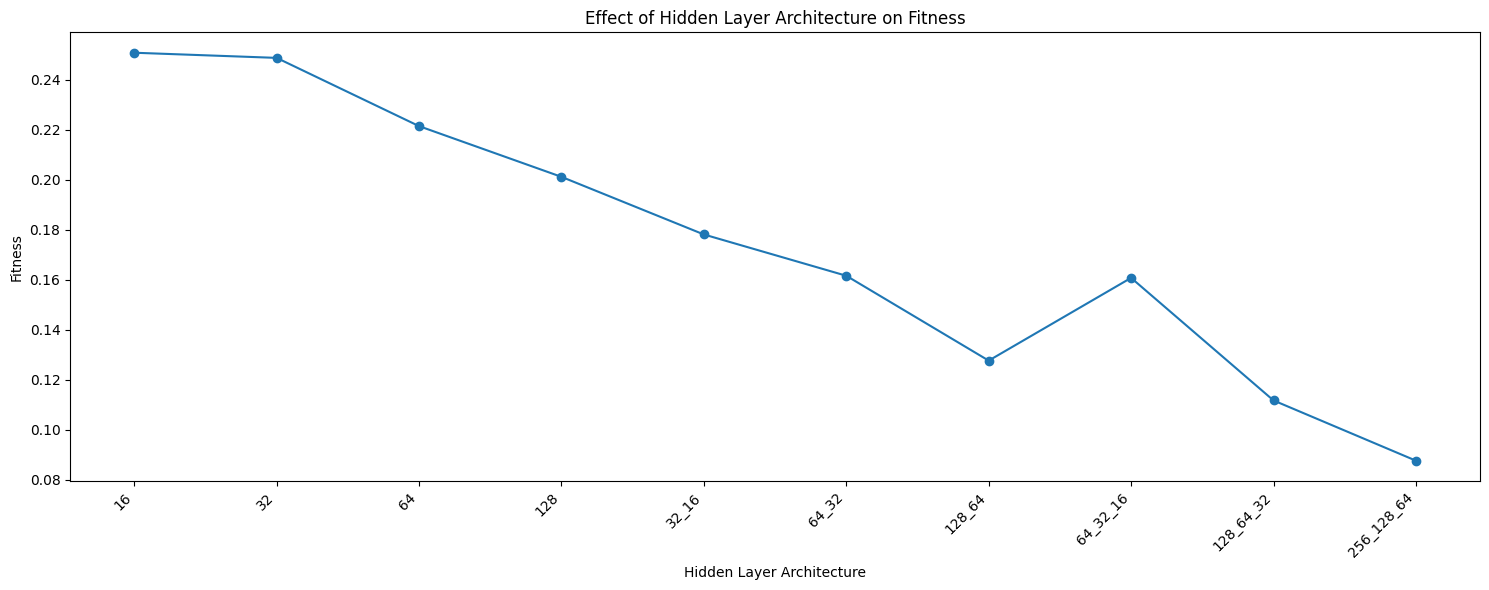

In [18]:
hidden_layer_results = []
for layers in hidden_layer_architectures:
    fitness = run_ANN_PSO(best_dropout_rate, layers, initial_inertia_weight, 
                          initial_c1, initial_c2, initial_num_particles, initial_max_iters)
    hidden_layer_results.append((layers, fitness))
    print(f'Hidden Layers: {layers}, Fitness: {fitness}')
    if fitness < best_fitness:
        best_hidden_layers = layers
        best_fitness = fitness

best_fitness = float('inf')
plot_results(hidden_layer_results, 'Hidden Layer Architecture')

Iteration 10/100, Best Fitness: 0.8616775274276733
Iteration 20/100, Best Fitness: 0.5679157137870788
Iteration 30/100, Best Fitness: 0.42860179543495175
Iteration 40/100, Best Fitness: 0.37224710583686826
Iteration 50/100, Best Fitness: 0.34893291592597964
Iteration 60/100, Best Fitness: 0.33246545791625975
Iteration 70/100, Best Fitness: 0.31845971941947937
Iteration 80/100, Best Fitness: 0.30662189722061156
Iteration 90/100, Best Fitness: 0.2960682034492492
Iteration 100/100, Best Fitness: 0.2875408113002777
Inertia Weight: 0.1, Fitness: 0.2875408113002777
Iteration 10/100, Best Fitness: 0.7767514944076538
Iteration 20/100, Best Fitness: 0.5509816884994507
Iteration 30/100, Best Fitness: 0.4079576790332794
Iteration 40/100, Best Fitness: 0.3521554589271545
Iteration 50/100, Best Fitness: 0.32521010041236875
Iteration 60/100, Best Fitness: 0.30757097005844114
Iteration 70/100, Best Fitness: 0.2926042377948761
Iteration 80/100, Best Fitness: 0.2809295475482941
Iteration 90/100, Best F

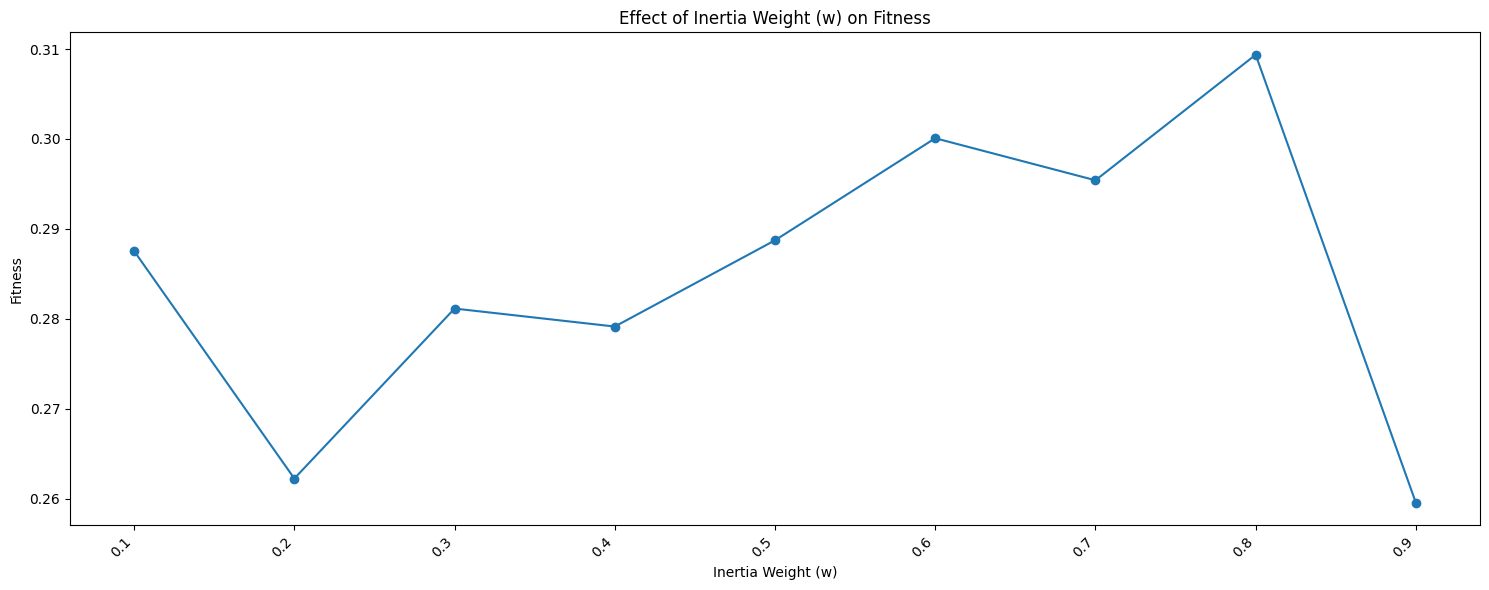

In [20]:
inertia_results = []
for w in inertia_weights:
    fitness = run_ANN_PSO(best_dropout_rate, best_hidden_layers, w, 
                          initial_c1, initial_c2, initial_num_particles, initial_max_iters)
    inertia_results.append((w, fitness))
    print(f'Inertia Weight: {w}, Fitness: {fitness}')
    if fitness < best_fitness:
        best_inertia_weight = w
        best_fitness = fitness

best_fitness = float('inf')
plot_results(inertia_results, 'Inertia Weight (w)')

Iteration 10/100, Best Fitness: 0.6651461839675903
Iteration 20/100, Best Fitness: 0.48466573953628544
Iteration 30/100, Best Fitness: 0.40148822665214534
Iteration 40/100, Best Fitness: 0.35076438784599306
Iteration 50/100, Best Fitness: 0.3213619291782379
Iteration 60/100, Best Fitness: 0.3027710378170013
Iteration 70/100, Best Fitness: 0.29036831855773926
Iteration 80/100, Best Fitness: 0.2793322682380676
Iteration 90/100, Best Fitness: 0.27067646384239197
Iteration 100/100, Best Fitness: 0.26280617117881777
c1: 0.1, c2: 0.1, Fitness: 0.26280617117881777
Iteration 10/100, Best Fitness: 0.7959565758705138
Iteration 20/100, Best Fitness: 0.555802583694458
Iteration 30/100, Best Fitness: 0.44629159569740295
Iteration 40/100, Best Fitness: 0.3968746423721313
Iteration 50/100, Best Fitness: 0.3693816900253296
Iteration 60/100, Best Fitness: 0.3491637647151947
Iteration 70/100, Best Fitness: 0.33481141924858093
Iteration 80/100, Best Fitness: 0.3230428397655487
Iteration 90/100, Best Fitn

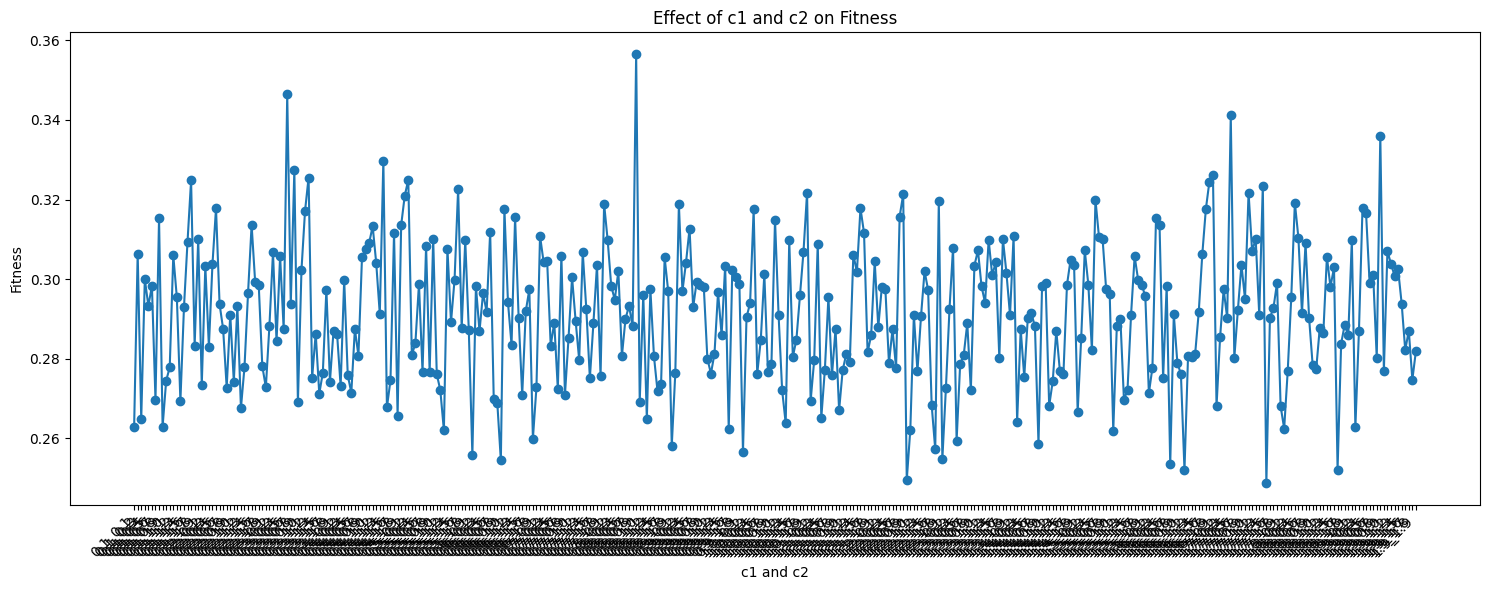

In [22]:
c1_c2_results = []
for c1 in c1_values:
    for c2 in c2_values:
        fitness = run_ANN_PSO(best_dropout_rate, best_hidden_layers, best_inertia_weight, 
                              c1, c2, initial_num_particles, initial_max_iters)
        c1_c2_results.append(((c1, c2), fitness))
        print(f'c1: {c1}, c2: {c2}, Fitness: {fitness}')
        if fitness < best_fitness:
            best_c1, best_c2 = c1, c2
            best_fitness = fitness

best_fitness = float('inf')
plot_results(c1_c2_results, 'c1 and c2')

Iteration 10/100, Best Fitness: 0.8378734946250915
Iteration 20/100, Best Fitness: 0.5771035552024841
Iteration 30/100, Best Fitness: 0.48096821308135984
Iteration 40/100, Best Fitness: 0.43049080967903136
Iteration 50/100, Best Fitness: 0.39164651632308956
Iteration 60/100, Best Fitness: 0.36499775052070615
Iteration 70/100, Best Fitness: 0.3461382329463959
Iteration 80/100, Best Fitness: 0.33136771321296693
Iteration 90/100, Best Fitness: 0.3208322286605835
Iteration 100/100, Best Fitness: 0.31240529417991636
Number of Particles: 10, Fitness: 0.31240529417991636
Iteration 10/100, Best Fitness: 0.6051609992980957
Iteration 20/100, Best Fitness: 0.42692231535911557
Iteration 30/100, Best Fitness: 0.34736341834068296
Iteration 40/100, Best Fitness: 0.3067458629608154
Iteration 50/100, Best Fitness: 0.28361297249794004
Iteration 60/100, Best Fitness: 0.2668552756309509
Iteration 70/100, Best Fitness: 0.2549631178379059
Iteration 80/100, Best Fitness: 0.2440119206905365
Iteration 90/100, 

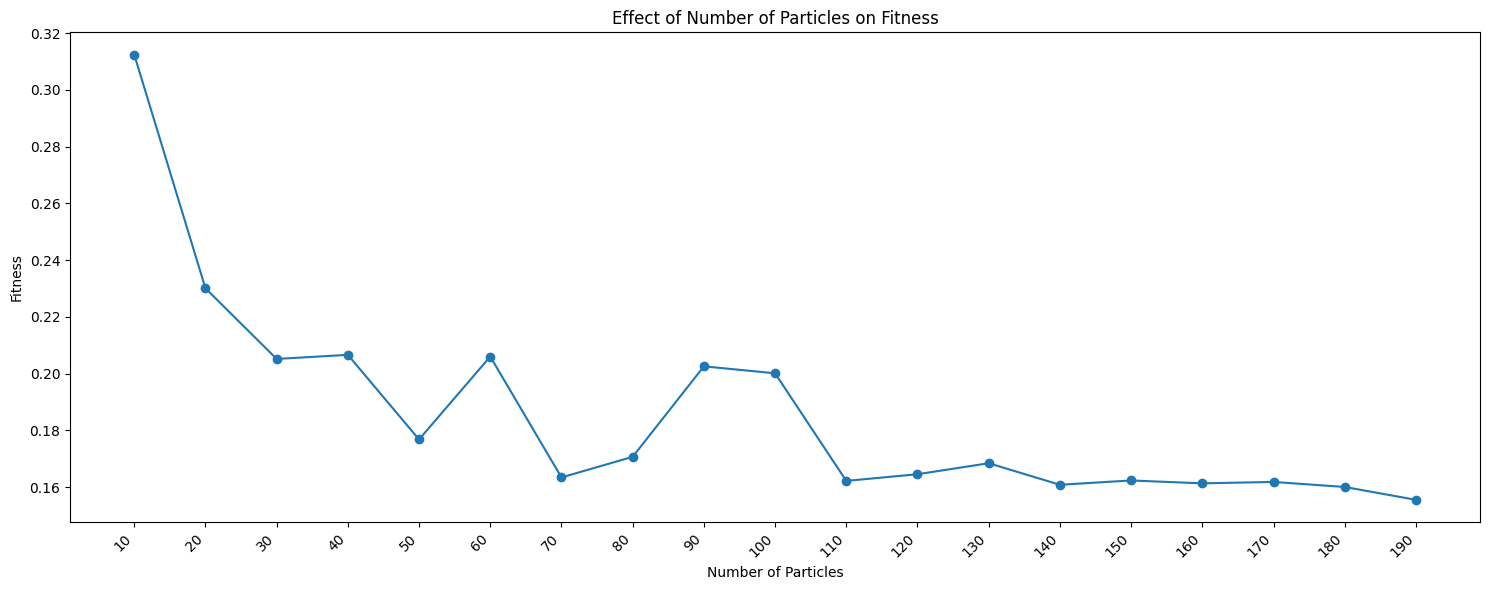

In [25]:
particle_results = []
for num_particles in particle_counts:
    fitness = run_ANN_PSO(best_dropout_rate, best_hidden_layers, best_inertia_weight, 
                          best_c1, best_c2, num_particles, initial_max_iters)
    particle_results.append((num_particles, fitness))
    print(f'Number of Particles: {num_particles}, Fitness: {fitness}')
    if fitness < best_fitness:
        best_num_particles = num_particles
        best_fitness = fitness

best_fitness = float('inf')
plot_results(particle_results, 'Number of Particles')

Iteration 10/100, Best Fitness: 0.8409991979598999
Iteration 20/100, Best Fitness: 0.5870645880699158
Iteration 30/100, Best Fitness: 0.45161134004592896
Iteration 40/100, Best Fitness: 0.3847690343856811
Iteration 50/100, Best Fitness: 0.3551304697990417
Iteration 60/100, Best Fitness: 0.33651553392410277
Iteration 70/100, Best Fitness: 0.32363803982734685
Iteration 80/100, Best Fitness: 0.3107437789440155
Iteration 90/100, Best Fitness: 0.30328047275543213
Iteration 100/100, Best Fitness: 0.2933178424835205
Max Iterations: 100, Fitness: 0.2933178424835205
Iteration 10/200, Best Fitness: 1.3160372018814086
Iteration 20/200, Best Fitness: 0.7930780887603759
Iteration 30/200, Best Fitness: 0.6257401466369629
Iteration 40/200, Best Fitness: 0.505448865890503
Iteration 50/200, Best Fitness: 0.43206356167793275
Iteration 60/200, Best Fitness: 0.38630337119102476
Iteration 70/200, Best Fitness: 0.361390209197998
Iteration 80/200, Best Fitness: 0.3494901776313782
Iteration 90/200, Best Fitne

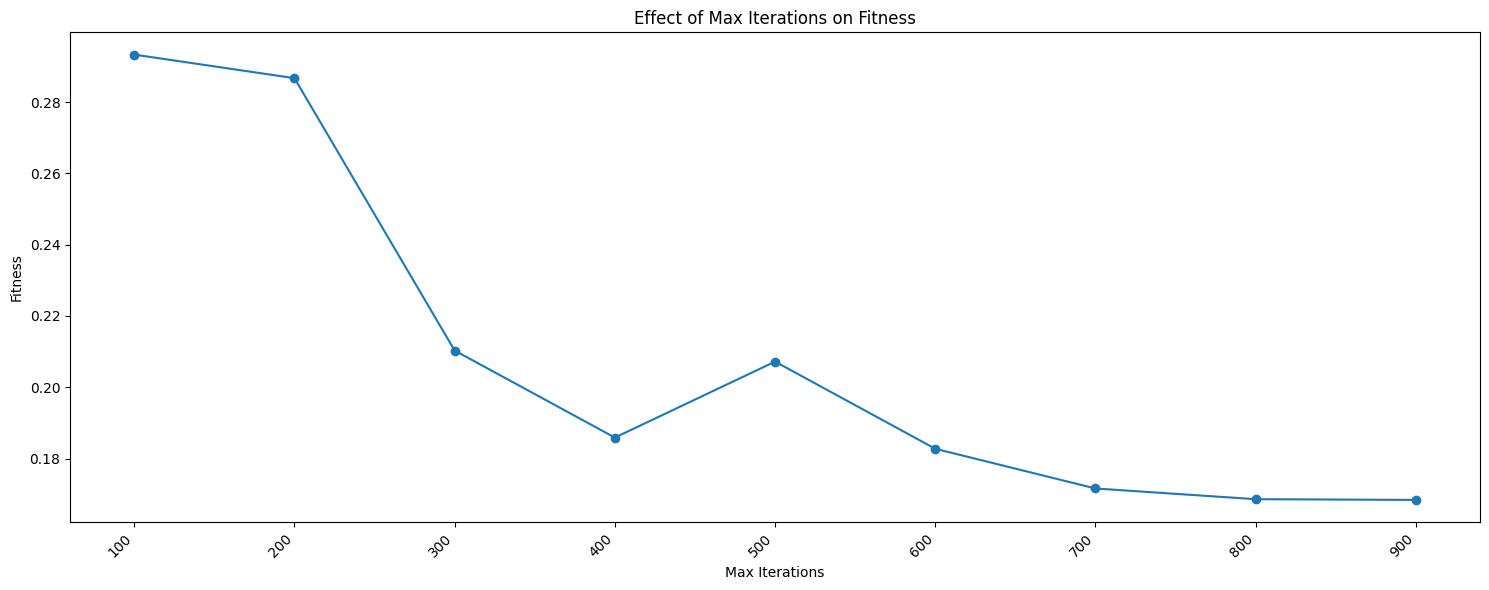

In [12]:
max_iters_results = []
for max_iters in max_iterations_values:
    fitness = run_ANN_PSO(best_dropout_rate, best_hidden_layers, best_inertia_weight, 
                          best_c1, best_c2, best_num_particles, max_iters)
    max_iters_results.append((max_iters, fitness))
    print(f'Max Iterations: {max_iters}, Fitness: {fitness}')
    if fitness < best_fitness:
        best_max_iters = max_iters
        best_fitness = fitness
plot_results(max_iters_results, 'Max Iterations')

In [27]:
# best_dropout_rate = 0.1
# best_hidden_layers = [256,128,64]
# best_inertia_weight = 0.2
# best_c1 = 1.7
# best_c2 = 1.5
# best_num_particles = 200
# best_max_iters = 900

best_dropout_rate = 0.1
best_hidden_layers = [64,32]
best_inertia_weight = 0.2
best_c1 = 1.7
best_c2 = 1.5
best_num_particles = 70
best_max_iters = 400

In [28]:
model = ANN(input_size=28, hidden_layers=best_hidden_layers, output_size=1, dropout_rate=best_dropout_rate).to(device)
pso = PSO(model, best_inertia_weight, best_c1, best_c2, best_num_particles, best_max_iters, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor, use_adam=True)
fitness = pso.optimize()

Iteration 10/400, Best Fitness: 0.16217524409294126
Iteration 20/400, Best Fitness: 0.1294875144958496
Iteration 30/400, Best Fitness: 0.11298111677169799
Iteration 40/400, Best Fitness: 0.10568197071552277
Iteration 50/400, Best Fitness: 0.10128204375505448
Iteration 60/400, Best Fitness: 0.09823338240385054
Iteration 70/400, Best Fitness: 0.09598034173250197
Iteration 80/400, Best Fitness: 0.0936064898967743
Iteration 90/400, Best Fitness: 0.09131845086812973
Iteration 100/400, Best Fitness: 0.08781633675098419
Iteration 110/400, Best Fitness: 0.08553942441940307
Iteration 120/400, Best Fitness: 0.08478737175464629
Iteration 130/400, Best Fitness: 0.083809295296669
Iteration 140/400, Best Fitness: 0.08322078436613083
Iteration 150/400, Best Fitness: 0.08267988860607148
Iteration 160/400, Best Fitness: 0.08198794424533844
Iteration 170/400, Best Fitness: 0.08164483904838563
Iteration 180/400, Best Fitness: 0.08151149600744248
Iteration 190/400, Best Fitness: 0.08113471418619156
Iterat

In [30]:
model.eval()
with torch.no_grad():
    pso_predictions = model(x_test_tensor).cpu().numpy()

pso_mse = mean_squared_error(y_test, pso_predictions)
pso_mae = mean_absolute_error(y_test, pso_predictions)
pso_r2 = r2_score(y_test, pso_predictions)

print(f'PSO-ANN Test Mean Square Error: {pso_mse:.4f}')
print(f'PSO-ANN Test Mean Absolute Error: {pso_mae:.4f}')
print(f'PSO-ANN Test R2: {pso_r2:.4f}')

PSO-ANN Test Mean Square Error: 0.0732
PSO-ANN Test Mean Absolute Error: 0.1271
PSO-ANN Test R2: 0.9360


In [32]:
standalone_model = ANN(input_size=x_train.shape[1], hidden_layers=best_hidden_layers, output_size=1, dropout_rate=best_dropout_rate).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(standalone_model.parameters(), lr=0.001)

num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    standalone_model.train()
    for i in range(0, len(x_train_tensor), batch_size):
        batch_x = x_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = standalone_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        standalone_model.eval()
        with torch.no_grad():
            val_outputs = standalone_model(x_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


Epoch [10/100], Train Loss: 0.0379, Val Loss: 0.1002
Epoch [20/100], Train Loss: 0.0011, Val Loss: 0.0924
Epoch [30/100], Train Loss: 0.0050, Val Loss: 0.0879
Epoch [40/100], Train Loss: 0.0040, Val Loss: 0.0870
Epoch [50/100], Train Loss: 0.0033, Val Loss: 0.0869
Epoch [60/100], Train Loss: 0.0012, Val Loss: 0.0840
Epoch [70/100], Train Loss: 0.0058, Val Loss: 0.0896
Epoch [80/100], Train Loss: 0.0002, Val Loss: 0.0877
Epoch [90/100], Train Loss: 0.0001, Val Loss: 0.0831
Epoch [100/100], Train Loss: 0.0013, Val Loss: 0.0834


In [33]:
standalone_model.eval()
with torch.no_grad():
    ann_predictions = standalone_model(x_test_tensor).cpu().numpy()

ann_mse = mean_squared_error(y_test, ann_predictions)
ann_mae = mean_absolute_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

print(f'Standalone ANN Test Mean Square Error: {ann_mse:.4f}')
print(f'Standalone ANN Test Mean Absolute Error: {ann_mae:.4f}')
print(f'Standalone ANN Test R2: {ann_r2:.4f}')

Standalone ANN Test Mean Square Error: 0.0834
Standalone ANN Test Mean Absolute Error: 0.1411
Standalone ANN Test R2: 0.9271


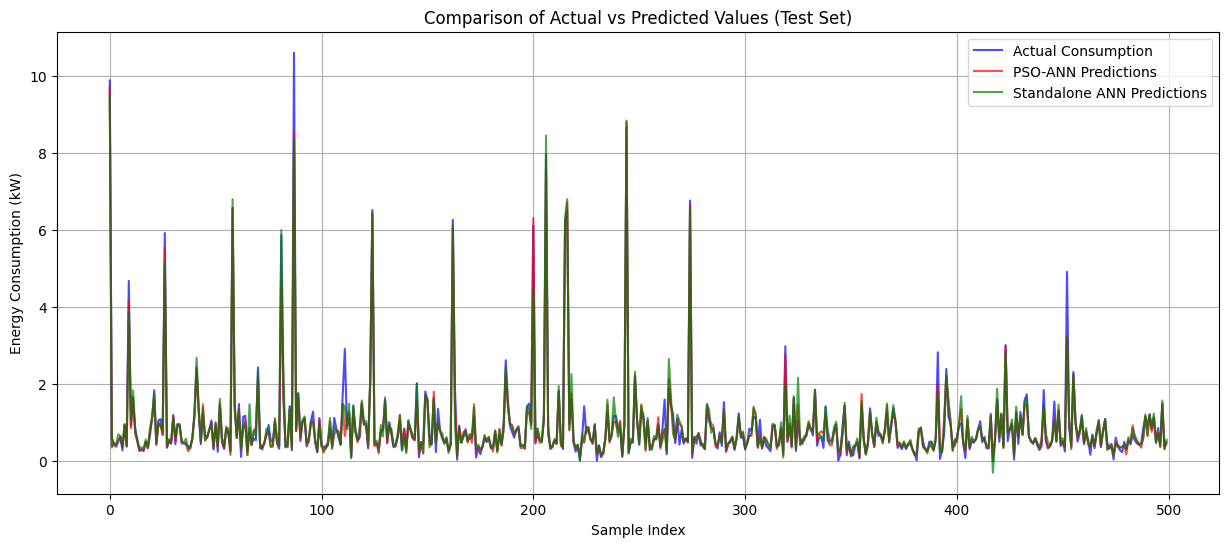

In [34]:
plt.figure(figsize=(15,6))
plt.plot(y_test[:500], label='Actual Consumption', color='b', linestyle='-', alpha=0.7)
plt.plot(pso_predictions[:500], label='PSO-ANN Predictions', color='r', linestyle='-', alpha=0.7)
plt.plot(ann_predictions[:500], label='Standalone ANN Predictions', color='g', linestyle='-', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (kW)')
plt.title('Comparison of Actual vs Predicted Values (Test Set)')
plt.legend()
plt.grid()
plt.show()